####<b>TASK-2-  Predicting Optimal number of clusters for given Iris Dataset and visualize that clusters.</b>

We will be using our standard Iris dataset.
Also, we will be exploring <b>The Elbow Method</b> which is most priorly used for knowing the optimal number of clusters.

For more information about *The Elbow method* follow 
<a href = "https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb">this link</a>.

For getting more information regarding <b>*Iris flower species* </b>and <b>*available datasets* </b> <a href = "https://en.wikipedia.org/wiki/Iris_flower_data_set"> click this link</a>.

This project is built by <b>Paridhi Jain.</b>

<b>Jan-2021 Batch Intern, The Sparks Foundation</b>

Let's Begin with this...



### Importing basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
dataset = pd.read_csv("Iris.csv")

x = dataset.iloc[:,:-1].values

In [ ]:
x.shape

(150, 5)

### Data Preparation

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.shape

(150, 6)

In [ ]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
dataset["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Using <b>Elbow Method</b> to find out optimal number of clusters

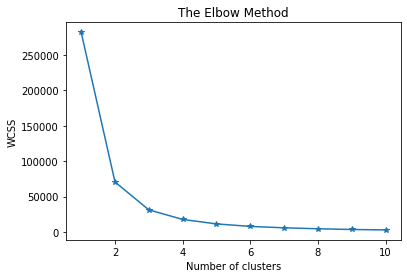

In [ ]:
from sklearn.cluster import KMeans

wcss = []
#within clusters sum of squares computed for y-axis

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++",random_state=42)
  #k-means++ is used to avoid random initialisation trap
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker = "*")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()





*So, by looking at the graph above it is quite obvious that wcss graph starts reducing least from point 3 on x-axis which says that we need to take optimal numbers of clusters = 3.*




### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(y_kmeans)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Visualising the clusters

Text(0.5, 1.0, 'Prediction results of clusters')

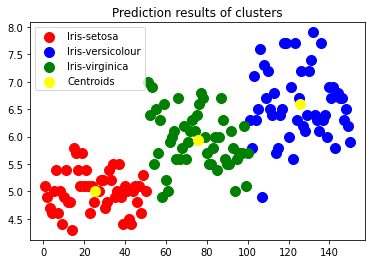

In [ ]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
             s = 100, c = "red", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
             s = 100, c = "blue", label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
             s = 100, c = "green", label = "Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = "yellow",s = 100,label = "Centroids")

plt.legend()
plt.title("Prediction results of clusters")
